**Titanic Survival Prediction*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Task 1.csv to Task 1 (1).csv


In [ ]:
df = pd.read_csv('Task 1.csv')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
train_df = pd.read_csv('Task 1.csv')
test_df = pd.read_csv('Task 1.csv')

print("Train DataFrame Head:")
print(train_df.head())

print("\nTest DataFrame Head:")
print(test_df.head())

Train DataFrame Head:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.05

Imputation of Age and Embarked Features

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

data = train_df[['Survived', 'Pclass', 'Sex','Age', 'SibSp','Parch', 'Fare', 'Embarked']]

In [ ]:
# Sex and Embarked encoding

sx_em_dumm = pd.get_dummies(data[['Sex', 'Embarked']], drop_first=True)
data1 = pd.concat([data, sx_em_dumm], axis=1)
data1.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [ ]:
# Scaling for KNN Imputer

scaler = MinMaxScaler()
datatrmd = scaler.fit_transform(data1)
df = pd.DataFrame(data=datatrmd, columns=data1.columns)

In [ ]:
# Imputing Missing Values
knn_imputer = KNNImputer(weights='distance', copy=True)
df1 = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

In [ ]:
datainv = scaler.inverse_transform(df1)
df2 = pd.DataFrame(data=datainv, columns=data1.columns)

In [ ]:
# Inverse Encode Sex and Embarked

def sexify(feature):
  X = feature.copy()

  sex = []
  for i in X:
    if float(i) == 1.0:
      sex.append('male')
    else:
      sex.append('female')

  return sex

def embify(data):
  X = data.copy()
  embark = []

  for i in range(len(X)):
    if (X.iloc[i, 0] == 1.0)  & (X.iloc[i, 1] == 0.0):
      embark.append('Q')
    elif (X.iloc[i, 0] == 0.0) & (X.iloc[i, 1] == 1.0):
      embark.append('S')
    elif (X.iloc[i, 0] == 0.0) & (X.iloc[i, 1] == 0.0):
      embark.append('C')

  return embark

In [ ]:
# Recreating the Sex feature
df2['Sex'] = sexify(df['Sex_male'])

In [ ]:
# Recreating the Embarked Feature
df2['Embarked'] = embify(df[['Embarked_Q', 'Embarked_S']])

In [ ]:
train_data = pd.concat([df2, train_df[['PassengerId', 'Name']]], axis=1)
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Sex,Embarked,PassengerId,Name
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0,male,S,1,"Braund, Mr. Owen Harris"
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,female,C,2,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,female,S,3,"Heikkinen, Miss. Laina"
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,female,S,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0,male,S,5,"Allen, Mr. William Henry"


Exploration the Relationship of Features to Survival

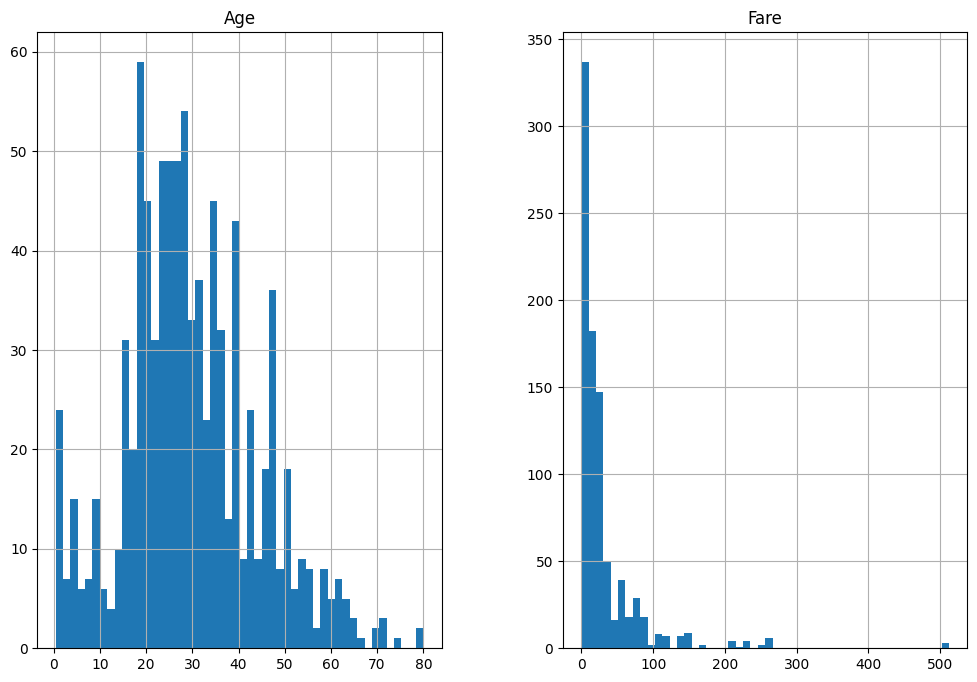

In [ ]:
train_data[['Age', 'Fare']].hist(bins=50, figsize=(12, 8))
plt.show()

Sex

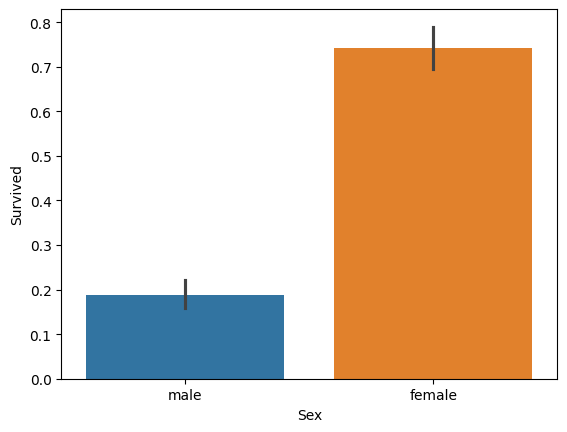

In [ ]:
sns.barplot(data=train_data, x='Sex', y='Survived', hue='Sex')
plt.show()

Pclass

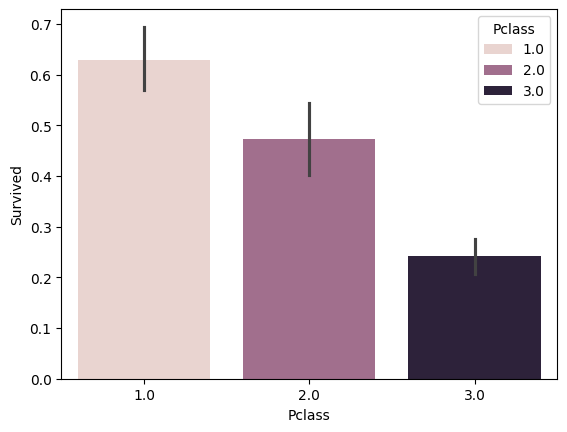

In [ ]:
sns.barplot(data=train_data, x= 'Pclass', y='Survived', hue='Pclass')
plt.show()

Observation

Passenger class 1 and 2 have a higher likelihood to survive.

Age
We will create a new class feature - AgeGroup which will assist in classification of age and give the general relationship with the Survival feature. Classification will be as follows:

0-5 -> Baby

6-15 -> Child

16-35 -> Youth

36-55 -> Adult

55-80 -> Senior

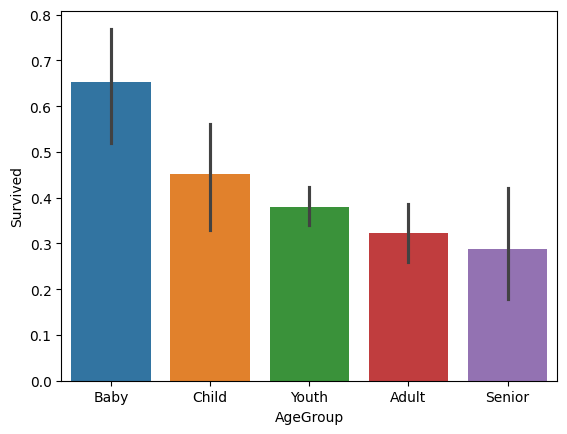

In [ ]:
import numpy as np

bins = [0, 6, 16, 36, 55, np.inf]
labels = ['Baby', 'Child', 'Youth', 'Adult', 'Senior']

train_data['AgeGroup'] = pd.cut(train_data['Age'], bins = bins, labels = labels)

sns.barplot(data=train_data, x='AgeGroup', y='Survived', hue='AgeGroup')
plt.show()

**Observation**

1. Babies have a high likelihood to survive
2. Childrend and Adults have a similar likelihood to survive almost shared with youths
3. Seniors have the lowest survival rate




4. **SibSp**

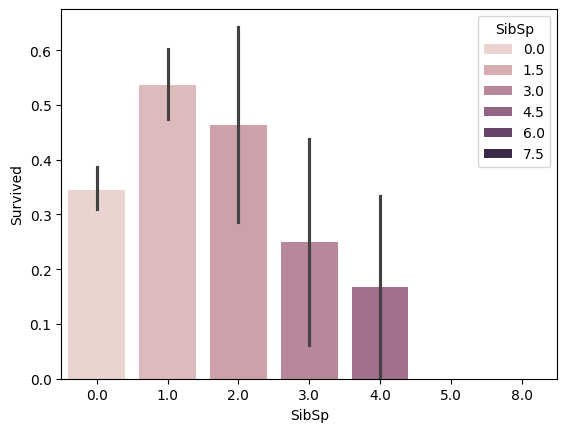

In [ ]:
sns.barplot(data=train_data, x='SibSp', y='Survived', hue='SibSp')
plt.show()

**Observations**

There is a high likelihood to survive for a passenger who is alone or with only one extra person.

5. **Parch**

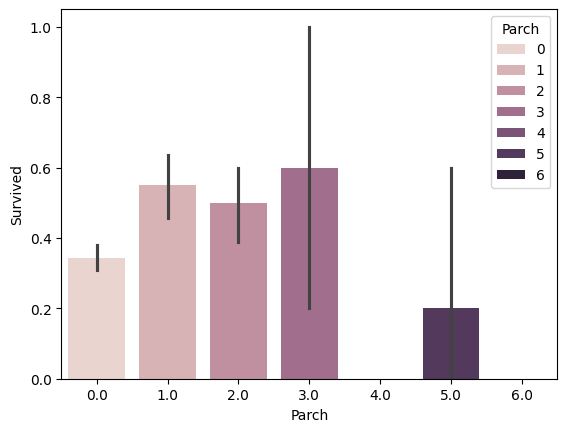

In [ ]:
sns.barplot(data=train_data, x='Parch', y='Survived', hue='Parch')
plt.show()

**Observation**

Passengers with parent child relationship were more likely to survive.

6. **Ticket**

In [ ]:
# Replace 'Ticket' with another column name that exists in the DataFrame
column_name = 'Pclass'

891 - int(train_data[column_name].unique().shape[0])


Only 210 tickets are shared among the passengers giving the impression that less could be got from the Ticket feature.

7. **Fare**

There are fares which are zero which is not factual. This notebook will impute them using Pclass means.

In [ ]:
train_data[['Fare', 'Pclass']][train_data['Fare'] == 0]

,Fare,Pclass
179,0.0,3.0
263,0.0,1.0
271,0.0,3.0
277,0.0,2.0
302,0.0,3.0
413,0.0,2.0
466,0.0,2.0
481,0.0,2.0
597,0.0,3.0
633,0.0,1.0


In [ ]:
pclass_mean1 = round(train_data['Fare'][train_data['Pclass'] == 1].mean(), 4)
pclass_mean2 = round(train_data['Fare'][train_data['Pclass'] == 2].mean(), 4)
pclass_mean3 = round(train_data['Fare'][train_data['Pclass'] == 3].mean(), 4)
print(f'Mean 1: {pclass_mean1}, Mean 2: {pclass_mean2}, Mean : {pclass_mean3}')

Mean 1: 84.1547, Mean 2: 20.6622, Mean : 13.6756


In [ ]:
train_data['Fare'][(train_data['Pclass'] == 1) & (train_data['Fare'] == 0)] = pclass_mean1
train_data['Fare'][(train_data['Pclass'] == 2) & (train_data['Fare'] == 0)] = pclass_mean2
train_data['Fare'][(train_data['Pclass'] == 3) & (train_data['Fare'] == 0)] = pclass_mean3

<ipython-input-30-b4c530dcf896>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Fare'][(train_data['Pclass'] == 1) & (train_data['Fare'] == 0)] = pclass_mean1
<ipython-input-30-b4c530dcf896>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Fare'][(train_data['Pclass'] == 2) & (train_data['Fare'] == 0)] = pclass_mean2
<ipython-input-30-b4c530dcf896>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Fa

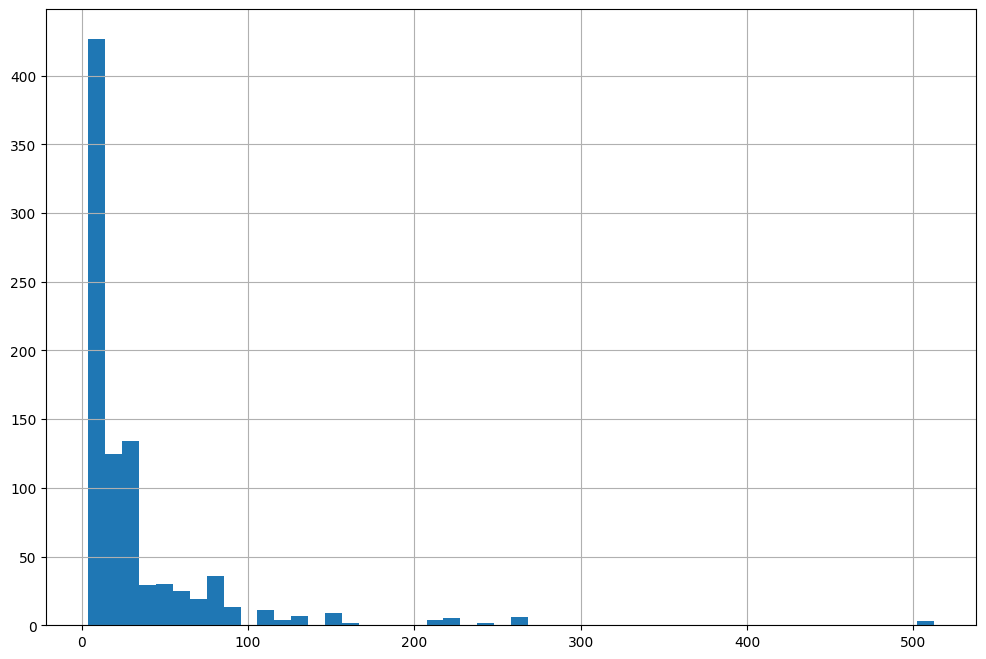

In [ ]:
train_data['Fare'].hist(bins=50, figsize=(12, 8))
plt.show()

Due to the disparity of the fare this notebook will create **FareGroup** feature as classified as:

0-40 -> Low(1)

41-100 -> Mid(2)

101-200 -> High(3)

201-500+ -> V.High(4)

In [ ]:
train_data['FareGroup'] = pd.cut(train_data['Fare'], bins = [0, 41, 101, 201, np.inf], labels=[1, 2, 3, 4]).astype(int)
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Sex,Embarked,PassengerId,Name,AgeGroup,FareGroup
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0,male,S,1,"Braund, Mr. Owen Harris",Youth,1
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,female,C,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Adult,2
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,female,S,3,"Heikkinen, Miss. Laina",Youth,1
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,female,S,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Youth,2
4,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0,male,S,5,"Allen, Mr. William Henry",Youth,1


8. **Embarked**

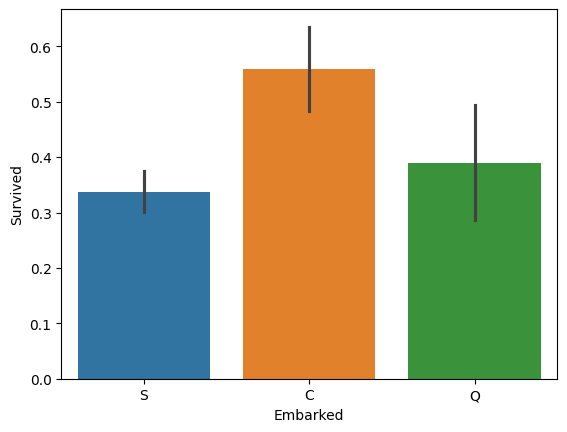

In [ ]:
sns.barplot(data=train_data, x='Embarked', y='Survived', hue='Embarked')
plt.show()

**Observations**

Passengers who embarked at Cherbourg had a high likelihood of survival with those at Southampton having the lowest of the three embarkment points.

9. **Name**

In [ ]:
# Funtion to take the dataframe and feature, pick the title and return a list of the titles
def titling(X, attrib):
    titles = []
    for i in range(len(X)):
        titles.append(str(train_data[attrib][i]).split('.')[0].split(',')[1].strip(' '))

    return titles

In [ ]:
train_data['Title'] = titling(train_data, 'Name')
train_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

<ipython-input-38-c938dd65b622>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(labels=train_data['Title'].unique(), rotation=45)


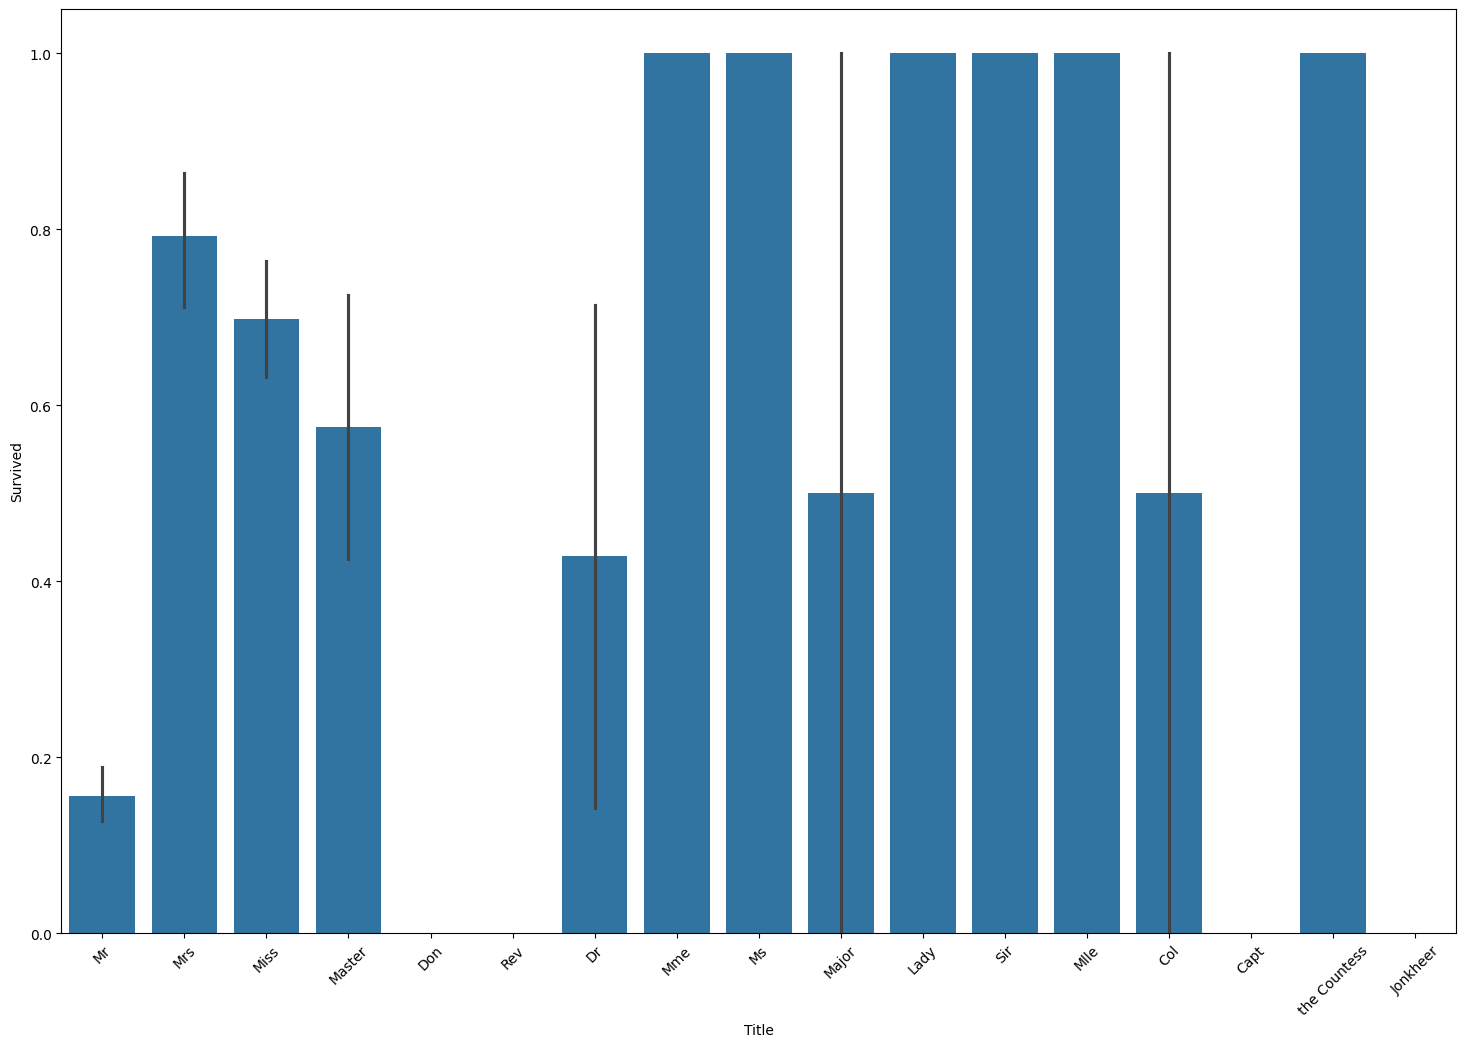

In [ ]:
plt.figure(figsize=(18, 12))
g = sns.barplot(data=train_data, x='Title', y='Survived')
g.set_xticklabels(labels=train_data['Title'].unique(), rotation=45)
plt.show()

**Observations**

From the plot above there is a classification of title and their survival rate. Royal titles had a good survival rate. Common titles had a fair chance of survival and lowest level had the poorest chance in survival.

Classes for the titles will be:

[Master, Major, Lady, Sir, Col, the Countess] -> Royal(1)

[Mr, Mrs, Miss, Dr, Mme, Ms, Mlle] -> Common(2)

[Don, Rev, Capt, Jonkheer] -> Low(3)

This notebook will use label encoding.

In [ ]:
def tilgrouping(X, attrib):
    royal = ['Master', 'Major', 'Lady', 'Sir', 'Col', 'the Countess']
    common = ['Mr', 'Mrs', 'Miss', 'Dr', 'Mme', 'Ms', 'Mlle']
    low = ['Don', 'Rev', 'Capt', 'Jonkheer']

    titleg = []

    for i in range(len(X[attrib])):
        if (X[attrib][i]) in royal:
            titleg.append(1)
        elif (X[attrib][i]) in common:
            titleg.append(2)
        elif (X[attrib][i]) in low:
            titleg.append(3)

    return titleg

In [ ]:
train_data['TitleGroup'] = tilgrouping(train_data, 'Title')
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Sex,Embarked,PassengerId,Name,AgeGroup,FareGroup,Title,TitleGroup
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0,male,S,1,"Braund, Mr. Owen Harris",Youth,1,Mr,2
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,female,C,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Adult,2,Mrs,2
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,female,S,3,"Heikkinen, Miss. Laina",Youth,1,Miss,2
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,female,S,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Youth,2,Mrs,2
4,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0,male,S,5,"Allen, Mr. William Henry",Youth,1,Mr,2


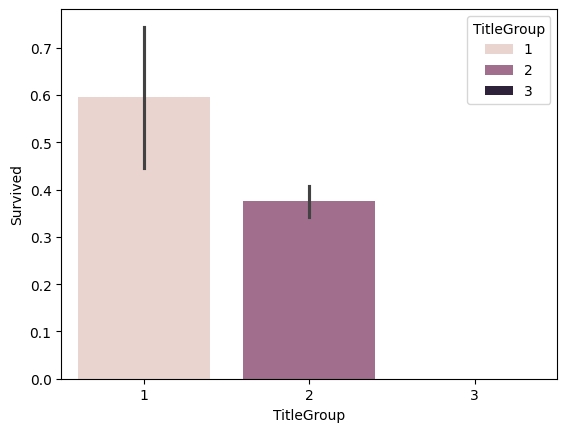

In [ ]:
sns.barplot(data=train_data, x='TitleGroup', y='Survived', hue='TitleGroup')
plt.show()

**Observations**

1. Class 1 which is royal has the higest chance at survival with:
2. class 3 with the lowest chance at survival

# 10. **Family Size and Family Type**

The Family Size and Family type are features engineered from _SibSp_ and _Parch_ features which singly have different effects on survival and this notebook wants to explore if they are combine what their effect is.

In [ ]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch']
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Sex,Embarked,PassengerId,Name,AgeGroup,FareGroup,Title,TitleGroup,FamilySize
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0,male,S,1,"Braund, Mr. Owen Harris",Youth,1,Mr,2,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,female,C,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Adult,2,Mrs,2,1.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,female,S,3,"Heikkinen, Miss. Laina",Youth,1,Miss,2,0.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,female,S,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Youth,2,Mrs,2,1.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0,male,S,5,"Allen, Mr. William Henry",Youth,1,Mr,2,0.0


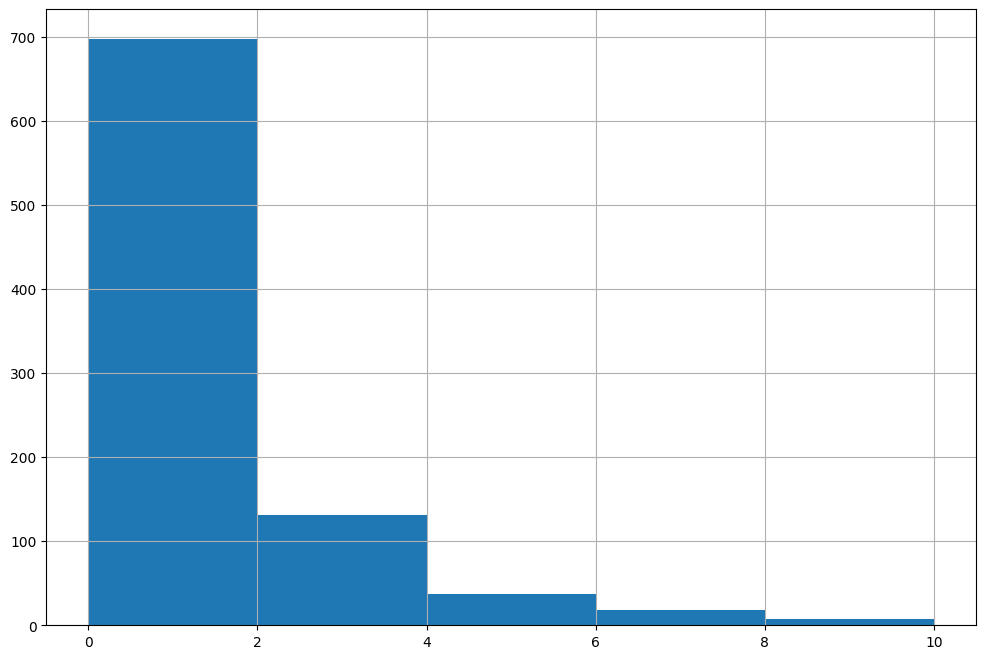

In [ ]:
train_data['FamilySize'].hist(bins =5, figsize=(12, 8))
plt.show()

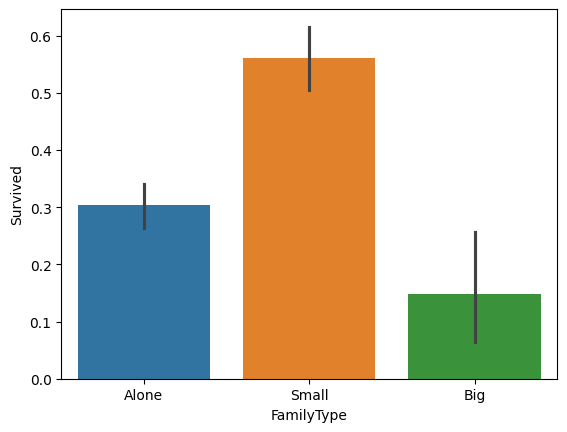

In [ ]:
train_data['FamilyType'] = pd.cut(train_data['FamilySize'], bins=[-1, 0.5, 4, np.inf], labels=['Alone', 'Small', 'Big'])

sns.barplot(data=train_data, x='FamilyType', y ='Survived', hue='FamilyType')
plt.show()

#### Creating a Clean Train, Validation and Test Data

Before delving into modelling and any transformation, this notebook first identifies the necessary features. Then it splits the **train_data** into **train** and **validation** datasets. Lastly transformations required follow.

Required features: 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'AgeGroup', 'FareGroup', 'TitleGroup', 'FamilySize', 'FamilyType'

Features for Encoding: 'Sex', 'Embarked', 'AgeGroup', 'FamilyType'

###### **One-Hot Encoding**
1. Sex
2. Embarked
3. AgeGroup

###### **Label Encoding**
1. FamilyType

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
                                                                 'Fare', 'Embarked', 'AgeGroup', 'FareGroup', 'TitleGroup', 'FamilySize', 'FamilyType']], train_data[['Survived']], test_size=0.3, random_state=42)

#### **One Hot Encoding**

In [ ]:
dummies = pd.get_dummies(X_train[['Sex', 'Embarked', 'AgeGroup']], drop_first=True)
inputs = pd.concat([X_train.drop(['Sex', 'Embarked', 'AgeGroup'], axis=1), dummies], axis=1)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(inputs['FamilyType'])
inputs['FamilyType'] = le.transform(inputs['FamilyType'])

#### Testing Different Models

This notebook will try and test the following models:

1. Random Forest
2. LightGBM
3. SVC
4. KNN
5. AdaBoost

6. CatBoost

From the 6 the best will then be selected to be used to predict survival of passengers in the test dataset

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.0 MB/s eta 0:00:00


In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier


def display_scores(scores):
    print('Scores: ', scores)
    print('Mean Score:', scores.mean())
    print('Std: ', scores.std())

1. KNN

In [ ]:
knn_cls = KNeighborsClassifier()
scores_knn = cross_val_score(knn_cls, inputs, y_train.values.ravel(), scoring='accuracy', cv=10)

display_scores(scores_knn)

Scores:  [0.61904762 0.73015873 0.71428571 0.69354839 0.69354839 0.69354839
 0.67741935 0.70967742 0.72580645 0.70967742]
Mean Score: 0.6966717869943677
Std:  0.030073546348640373


2. SVC

In [ ]:
svc_cls = SVC()

scores_svc = cross_val_score(svc_cls, inputs, y_train.values.ravel(), scoring='accuracy', cv=10)
display_scores(scores_svc)

Scores:  [0.68253968 0.68253968 0.71428571 0.69354839 0.62903226 0.61290323
 0.66129032 0.64516129 0.69354839 0.70967742]
Mean Score: 0.672452636968766
Std:  0.032450155074130176


3. Random Forest

In [ ]:
rf_cls = RandomForestClassifier()

scores_rf = cross_val_score(rf_cls, inputs, y_train.values.ravel(), scoring='accuracy', cv=10)
display_scores(scores_rf)

Scores:  [0.80952381 0.80952381 0.85714286 0.85483871 0.82258065 0.77419355
 0.82258065 0.82258065 0.80645161 0.88709677]
Mean Score: 0.8266513056835638
Std:  0.030288902402301997


4. LightGBM

In [ ]:
lgb_cls = LGBMClassifier()

scores_lgb = cross_val_score(lgb_cls, inputs, y_train.values.ravel(), scoring='accuracy', cv=10)
display_scores(scores_lgb)

[LightGBM] [Info] Number of positive: 207, number of negative: 353
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 560, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369643 -> initscore=-0.533749
[LightGBM] [Info] Start training from score -0.533749
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

5. AdaBoost

In [ ]:
ada_cls = AdaBoostClassifier()

scores_ada = cross_val_score(ada_cls, inputs, y_train.values.ravel(), scoring='accuracy', cv=10)
display_scores(scores_ada)

Scores:  [0.77777778 0.77777778 0.95238095 0.87096774 0.77419355 0.77419355
 0.82258065 0.82258065 0.79032258 0.91935484]
Mean Score: 0.8282130056323604
Std:  0.061624053280435936


6. CatBoost

In [ ]:
cat_features = ['Sex', 'Embarked', 'AgeGroup', 'FamilyType']
cat_cls = CatBoostClassifier(iterations=2500, learning_rate=0.05, random_seed=42, cat_features=cat_features, verbose=False)

scores_cat = cross_val_score(cat_cls, X_train, y_train.values.ravel(), scoring='accuracy', cv=10)

**Observation**

From little exploration, CatBoost performs the best with very high Test and Train Scores.
This notebook will explore a further exploration by means of hyperparameter tuning via GridSearch to select the best estimator with optimum parameters.

The selected algorithms for hyperparameter tuning are: Random Forest, AdaBoost, LightGBM, and CatBoost

#### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


# Random Forest param Grid
rf_param_grid = {
    'n_estimators': [100, 250, 400,],
    'criterion': ['gini', 'entropy'],
    "min_samples_split":[2,3,10],
    "min_samples_leaf":[1,3,10],
    'max_features': ['sqrt', 'log2'],
    'random_state':[8, 16, 42],
}

lgb_param_grid = {
    'boosting_type ':['gbdt', 'rf', 'goss', 'dart'],
    'learning_rate': [0.025, 0.05, 0.1, 0.2],
    'n_estimators': [100, 250, 400],
    'metric': ['auc', 'average_precision'],
    'random_state':[8, 16, 42],
}

ada_param_grid = {
    'n_estimators': [50, 100, 250],
    'learning_rate': [0.1, 0.5, 1, 1.5],
    'random_state':[8, 16, 42],
}

cat_param_grid = {
    'iterations': [1000, 1600, 2000, 2400],
    'learning_rate': [0.01, 0.03, 0.05],
    'random_state':[8, 16, 42],
}

classifier_param = [rf_param_grid, lgb_param_grid, ada_param_grid]

# Classifiers

classifier = [RandomForestClassifier(), LGBMClassifier(), AdaBoostClassifier()]

In [ ]:
cv_result = []
best_estimators = []

for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i],
                       scoring='accuracy', n_jobs=-1, cv=StratifiedKFold(n_splits=10))
    clf.fit(inputs, y_train.values.ravel())
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)

clf2 = GridSearchCV(CatBoostClassifier(cat_features=cat_features, verbose=False), param_grid=cat_param_grid,
                    scoring='accuracy', n_jobs=-1, cv=StratifiedKFold(n_splits=10))
clf2.fit(X_train, y_train.values.ravel())
cv_result.append(clf2.best_score_)
best_estimators.append(clf2.best_estimator_)


result = pd.DataFrame({'Mean Score': cv_result, 'Model': ['Random Forest', 'LightGBM', 'AdaBoost', 'CatBoost']})


g = sns.barplot(data=result, x='Mean Score', y='Model')
g.set_xlabel('Mean Score')
g.set_title('Mean Scores for the Models')
plt.show()

KeyboardInterrupt: 

In [ ]:
rf_model = best_estimators[0]
lgb_model= best_estimators[1]
ada_model = best_estimators[2]
cat_model = best_estimators[3]

IndexError: list index out of range

#### Validate the Models

In [ ]:
dummies_ = pd.get_dummies(X_valid[['Sex', 'Embarked', 'AgeGroup']], drop_first=True)
inputs_valid = pd.concat([X_valid.drop(['Sex', 'Embarked', 'AgeGroup'], axis=1), dummies_], axis=1)

inputs_valid['FamilyType'] =le.transform(inputs_valid['FamilyType'])
inputs_valid.head()

In [ ]:
rf_preds = rf_model.predict(inputs_valid)
lgb_preds = lgb_model.predict(inputs_valid)
ada_preds = ada_model.predict(inputs_valid)
cat_preds = cat_model.predict(X_valid)

rf_acc = accuracy_score(y_valid.values.ravel(), rf_preds)
lgb_acc = accuracy_score(y_valid.values.ravel(), lgb_preds)
ada_acc = accuracy_score(y_valid.values.ravel(), ada_preds)
cat_acc = accuracy_score(y_valid.values.ravel(), cat_preds)

print(f'Accuracies -> Random Forest: {rf_acc}, LightGBM: {lgb_acc}, AdaBoost: {ada_acc}, CatBoost:{cat_acc}')

**Observation**
From the test accuracies(demonstrating prediction on unseen data) the models rank as follows:
1. CatBoost
2. Random Forest
3. LightGBM & AdaBoost

###  **Predict Survival of the Passengers in the Test Data**



###### **Processing Test Data**

In [ ]:
X_train.shape

In [ ]:
df_test.info()

##### Imputing Missing Values and Feature Engineering in the Test Dataset

In [ ]:
data1.head()

In [ ]:
# Sex and Embarked Encoding
seencoding = pd.get_dummies(data1[['Sex', 'Embarked']], drop_first=True)
data_tst = pd.concat([data1.drop(['Sex', 'Embarked'], axis=1), seencoding], axis=1)

In [ ]:
data_tst.shape

In [ ]:
data_tst1.head()

In [ ]:
# Imputing Missing Values
data_tst2 = knn_imputer.fit_transform(data_tst1)
data_tst3 = pd.DataFrame(data=data_tst2, columns=data_tst1.columns)
data_tst3.head()

In [ ]:
data_tst_inv = scaler1.inverse_transform(data_tst3)
data_tst4 = pd.DataFrame(data=data_tst_inv, columns=data_tst3.columns)
data_tst4.head()

In [ ]:
# Recreate the Sex Feature
data_tst4['Sex'] = sexify(data_tst4['Sex_male'])

# Recreate the Embarked Feature
data_tst4['Embarked'] = embify(data_tst4[['Embarked_Q', 'Embarked_S']])

test_data = pd.concat([data_tst4[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']], df_test[['PassengerId','Name']]], axis=1)

In [ ]:
test_data.columns, X_train.columns

In [ ]:
test_data[['Fare', 'Pclass']][test_data['Fare'] == 0]

In [ ]:
pclass_mean1t = round(test_data['Fare'][test_data['Pclass'] == 1.0].mean(), 4)

In [ ]:
test_data['Fare'][(test_data['Fare'] == 0) & (test_data['Pclass'] == 1)] =pclass_mean1t

In [ ]:
test_data['AgeGroup'] = pd.cut(test_data['Age'], bins = bins, labels = labels)

test_data.head()

In [ ]:
test_data['FareGroup'] = pd.cut(test_data['Fare'], bins = [0, 41, 101, 201, np.inf], labels=[1, 2, 3, 4]).astype(int)

test_data['Title'] = titling(test_data, 'Name')

test_data['TitleGroup'] = tilgrouping(test_data, 'Title')

test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch']
test_data['FamilyType'] = pd.cut(test_data['FamilySize'], bins=[-1, 0.5, 4, np.inf], labels=['Alone', 'Small', 'Big'])

In [ ]:
test_data.info()

In [ ]:
test_data.to_csv('Task 1.csv',index=False)

In [ ]:
test_preds = cat_model.predict(test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'AgeGroup', 'FareGroup', 'TitleGroup', 'FamilySize', 'FamilyType']])

survival_results = pd.concat([df_test['PassengerId'], pd.Series(test_preds, name='Survived')], axis=1)

survival_results.to_csv('survived_submission.csv', index=False)

### **Saving the Model(s)**

In [ ]:
import joblib
import os

path = '/content/drive/MyDrive/MLData/Titanic'
filenames =  ['Titanic_CatBoost_model.joblib', 'Titanic_LightGBM_model.joblib', 'Titanic_RF_model.joblib','Titanic_Ada_model.joblib']
models = [cat_model, lgb_model, rf_model, ada_model]

for i in range(len(filenames)):
  joblib.dump(models[i], os.path.join(path, filenames[i]))

NameError: name 'cat_model' is not defined